In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

externo=0
interno=1
publica=0
privada=1
Noresidencias=0
siresidencias=1

In [3]:
data = pd.read_csv('../Etapa_3/viajes_universidades_por_hora_100km_final.csv')
data

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras
0,0,Campus Andrés Bello Uchile,Conchalí,0,0,1,1,45000,53
1,0,Campus Andrés Bello Uchile,Huechuraba,0,0,1,1,45000,53
2,0,Campus Andrés Bello Uchile,Lo Espejo,0,0,1,1,45000,53
3,0,Campus Andrés Bello Uchile,Providencia,0,0,1,7,45000,53
4,0,Campus Andrés Bello Uchile,Quilicura,0,0,1,1,45000,53
...,...,...,...,...,...,...,...,...,...
1823,23,UDP Facultad de economía y empresas,Colina,0,1,0,1,26400,14
1824,23,UDP Facultad de economía y empresas,Huechuraba,0,1,0,4,26400,14
1825,23,UDP Facultad de economía y empresas,Huechuraba,1,1,0,9,26400,14
1826,23,UDP Facultad de economía y empresas,Las Condes,0,1,0,1,26400,14


In [4]:
data['universidad']=data['universidad'].astype('category')
data['comuna_origen']=data['comuna_origen'].astype('category')

In [5]:
data['Uni']=data['universidad'].cat.codes
data['Comuna']=data['comuna_origen'].cat.codes 

In [6]:
enc = OneHotEncoder()

In [7]:
enc_data = pd.DataFrame(enc.fit_transform(data[['Uni','Comuna']]).toarray())

In [8]:
data = data.join(enc_data)

In [9]:
data

,timestamp,universidad,comuna_origen,tipo_de_viaje,tipo_de_universidad,tiene_residencia,count,tamaño_uni,n_carreras,Uni,...,52,53,54,55,56,57,58,59,60,61
0,0,Campus Andrés Bello Uchile,Conchalí,0,0,1,1,45000,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Campus Andrés Bello Uchile,Huechuraba,0,0,1,1,45000,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Campus Andrés Bello Uchile,Lo Espejo,0,0,1,1,45000,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Campus Andrés Bello Uchile,Providencia,0,0,1,7,45000,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Campus Andrés Bello Uchile,Quilicura,0,0,1,1,45000,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,23,UDP Facultad de economía y empresas,Colina,0,1,0,1,26400,14,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1824,23,UDP Facultad de economía y empresas,Huechuraba,0,1,0,4,26400,14,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,23,UDP Facultad de economía y empresas,Huechuraba,1,1,0,9,26400,14,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,23,UDP Facultad de economía y empresas,Las Condes,0,1,0,1,26400,14,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
x = data[['timestamp','Uni','Comuna','tipo_de_viaje','tipo_de_universidad','tiene_residencia','tamaño_uni','n_carreras']]
y = data['count']

In [11]:
times = data[['timestamp','count']]
times

,timestamp,count
0,0,1
1,0,1
2,0,1
3,0,7
4,0,1
...,...,...
1823,23,1
1824,23,4
1825,23,9
1826,23,1


In [12]:
timesprom = times.groupby('timestamp').mean().round()
timesprom

,count
timestamp,
0,8.0
1,7.0
2,5.0
3,6.0
4,6.0
5,4.0
6,3.0
7,3.0
8,3.0


In [13]:
timessum = times.groupby('timestamp').sum().round()
timessum

,count
timestamp,
0,710
1,1248
2,611
3,363
4,230
5,170
6,142
7,194
8,197


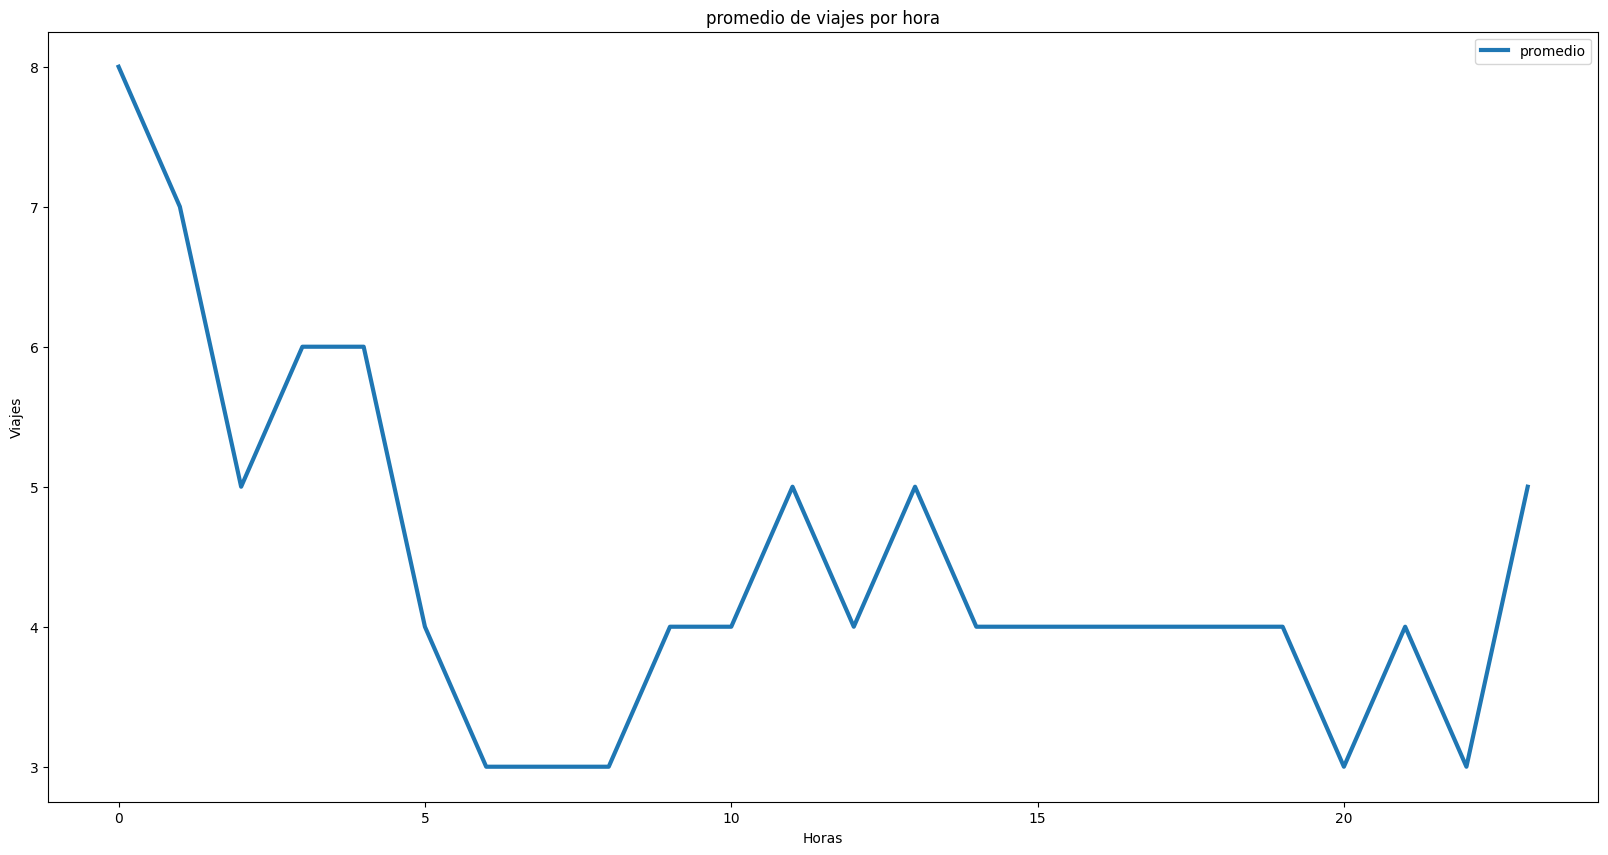

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x_ax = range(24)
plt.plot(x_ax, timesprom, linewidth=3, label="promedio")
#plt.plot(x_ax, timessum, linewidth=3, label="promedio")
plt.title("promedio de viajes por hora")
plt.xlabel('Horas')
plt.ylabel('Viajes')
plt.legend()
plt.show() 

In [15]:
x

,timestamp,Uni,Comuna,tipo_de_viaje,tipo_de_universidad,tiene_residencia,tamaño_uni,n_carreras
0,0,0,5,0,0,1,45000,53
1,0,0,10,0,0,1,45000,53
2,0,0,21,0,0,1,45000,53
3,0,0,33,0,0,1,45000,53
4,0,0,36,0,0,1,45000,53
...,...,...,...,...,...,...,...,...
1823,23,11,4,0,1,0,26400,14
1824,23,11,10,0,1,0,26400,14
1825,23,11,10,1,1,0,26400,14
1826,23,11,19,0,1,0,26400,14


In [16]:
y

0        1
1        1
2        1
3        7
4        1
        ..
1823     1
1824     4
1825     9
1826     1
1827    10
Name: count, Length: 1828, dtype: int64

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.20)

In [18]:
print("X_train shape: {}".format(Xtrain.shape))
print("X_test shape: {}".format(Xtest.shape))
print("y_train shape: {}".format(ytrain.shape))
print("y_test shape: {}".format(ytest.shape))
print("X_val shape: {}".format(Xval.shape))
print("y val shape: {}".format(yval.shape))

X_train shape: (1096, 8)
X_test shape: (457, 8)
y_train shape: (1096,)
y_test shape: (457,)
X_val shape: (275, 8)
y val shape: (275,)


In [19]:
model = LinearRegression()

In [20]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [21]:
print('\nparameter value: ',model.coef_) 
print('\nbias value:      ',model.intercept_) 


parameter value:  [-1.46347642e-01  1.66904014e-01  5.45402835e-02  4.82561046e+00
 -2.50209600e+00  3.50210375e-01  1.05127151e-05 -2.36917517e-02]

bias value:       4.330128902350863


In [22]:
print('\nr2: ',model.score(Xtrain, ytrain))


r2:  0.08005593202498884


In [23]:
ypred = model.predict(Xval)
print('Viajes:')
ypred

Viajes:


array([ 9.39821151,  3.22908782,  7.42749184,  4.05592815,  6.16425525,
        3.46634617, 11.63018373,  2.99821591,  3.83443978,  1.49391933,
        6.75642357,  4.15523104,  6.27752723,  0.96202723,  2.2383041 ,
        4.55349969,  8.47804885,  3.69995651,  4.51157785,  9.18032381,
       -0.1539077 ,  2.28826724,  5.69338656,  8.15080715,  8.00954268,
        2.16191347,  3.67751543,  4.42846459,  2.15193806,  4.52679684,
        2.99729093,  4.04070916,  8.87710404,  4.45258109, 10.82166772,
        2.98606562,  3.84083036,  3.77711898,  3.96904062,  5.68235898,
        5.32762788,  4.1071412 ,  4.25076818,  3.50552023,  7.16092008,
        1.75478984,  2.58188751,  4.33441357,  6.5823728 ,  5.32887778,
        3.57357026, 10.76898392,  2.11657796,  2.46271087,  3.21826626,
        1.04738415,  3.02333269,  3.69457626,  4.65792549,  3.08909829,
        2.15818369,  2.63278216,  6.16021593,  3.38723488,  4.20898478,
        4.42986657,  4.06900995,  2.30584637,  3.96727768,  3.34

In [24]:
mape = mean_absolute_percentage_error(yval, ypred)
#squared True returns MSE value, False returns RMSE value.
mse = r2_score(yval, ypred) 
rmse = mean_squared_error(yval, ypred, squared=False)

print("MAPE:", mape)
print("r2 :", mse)
print("RMSE:", rmse)

MAPE: 1.948605370163381
r2 : 0.09511522601536515
RMSE: 6.592002674592127


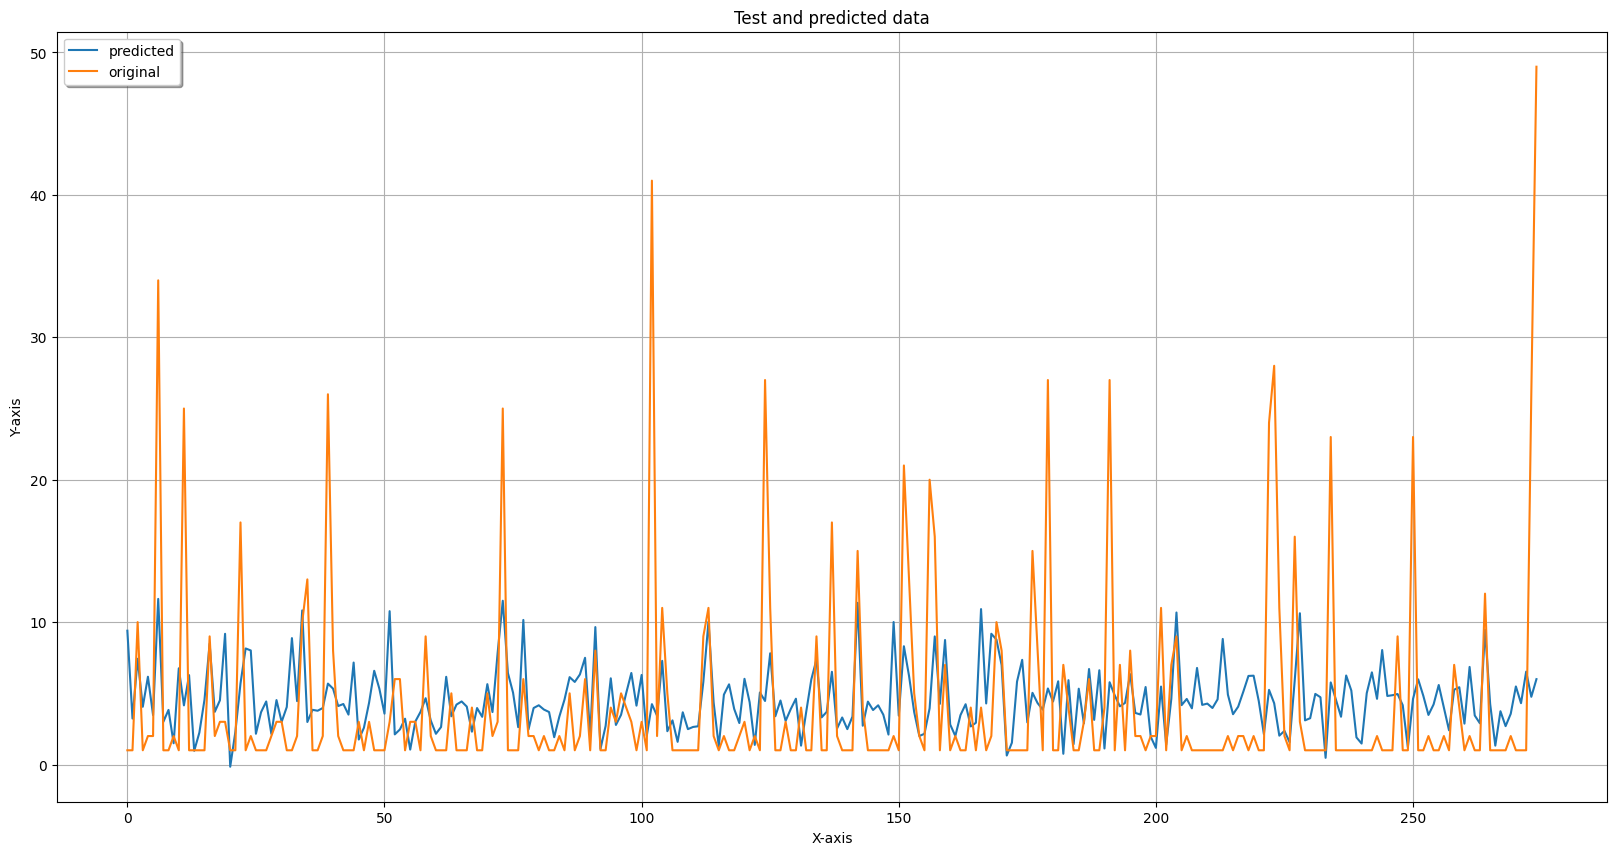

In [25]:
x_ax = range(len(yval))
plt.figure(figsize=(20,10))
plt.plot(x_ax, ypred, label="predicted")
plt.plot(x_ax, yval, label="original")

plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

---

In [26]:
model2 = LinearRegression(normalize=True, positive=True, n_jobs=100)

In [27]:
model2.fit(Xtrain, ytrain)

/home/mc/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(n_jobs=100, normalize=True, positive=True)

In [28]:
print('\nparameter value: ',model2.coef_) 
print('\nbias value:      ',model2.intercept_) 


parameter value:  [0.         0.11155509 0.04699899 4.7319868  0.         1.9828851
 0.         0.00511649]

bias value:       1.190687618045415


In [29]:
print('\nr2: ',model2.score(Xtrain, ytrain))


r2:  0.056700361769359886


In [30]:
ypred2 = model2.predict(Xval)
print('Viajes:')
ypred2

Viajes:


array([ 8.50501652,  2.36305998,  8.85698375,  4.33772731,  4.53166216,
        3.21569041,  9.5605805 ,  4.97097878,  1.55295053,  3.4857426 ,
        6.42655939,  2.95941435,  5.74769705,  1.59994952,  3.54468334,
        4.92397979,  6.14456544,  3.02104586,  4.2753861 ,  8.209486  ,
        2.11452846,  2.86892228,  3.87367628,  5.8625715 ,  8.209486  ,
        2.63392733,  3.52449819,  4.54659975,  2.83969848,  4.99571319,
        3.47990917,  3.61740023,  6.61455535,  3.70200602,  8.39989193,
        5.55970108,  3.19791522,  4.65137803,  4.53166216,  4.2753861 ,
        5.55970108,  1.78794549,  2.16393742,  4.09846962,  6.14456544,
        3.34648576,  4.3599919 ,  3.24491421,  5.15897475,  3.68568032,
        2.21093641,  9.45164493,  3.91047366,  4.2753861 ,  3.34648576,
        2.6774204 ,  5.4657031 ,  3.25248778,  4.2753861 ,  3.43291017,
        3.38240527,  3.2919132 ,  5.84630278,  2.68092632,  4.50098887,
        4.31299291,  3.35668738,  3.4774992 ,  3.48748274,  4.49

In [31]:
mape = mean_absolute_percentage_error(yval, ypred2)
#squared True returns MSE value, False returns RMSE value.
mse = r2_score(yval, ypred2) 
rmse = mean_squared_error(yval, ypred2, squared=False)

print("MAPE:", mape)
print("r2 :", mse)
print("RMSE:", rmse)

MAPE: 1.8696067048004963
r2 : 0.07910353285979643
RMSE: 6.650068793683744


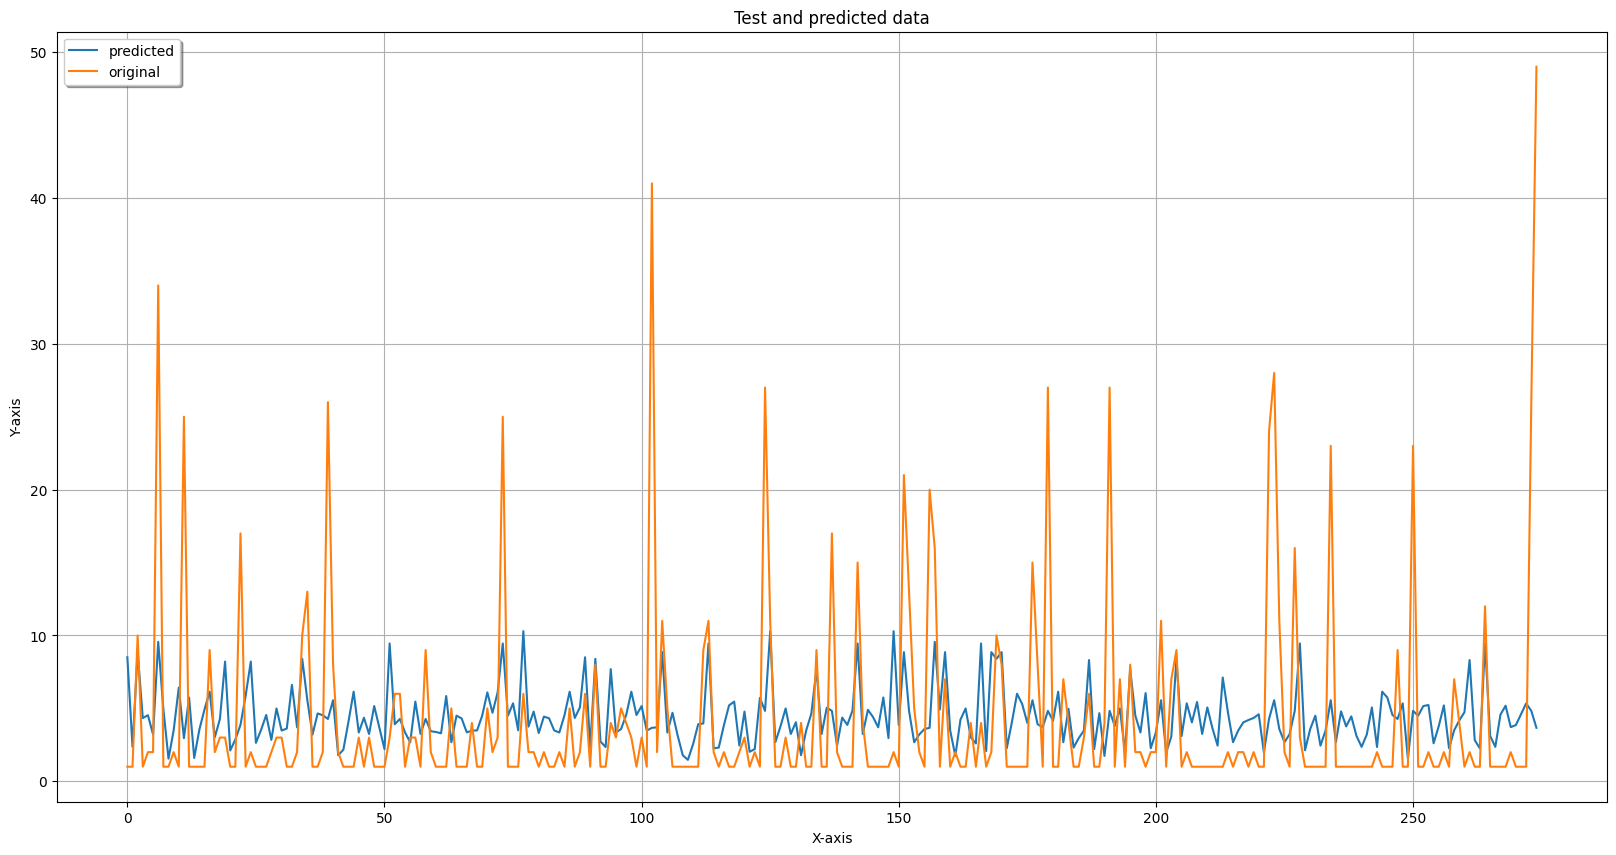

In [32]:
x_ax = range(len(yval))
plt.figure(figsize=(20,10))
plt.plot(x_ax, ypred2, label="predicted")
plt.plot(x_ax, yval, label="original")

plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()